In [32]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['font.size'] = 10
plt.style.use('ggplot')

In [18]:
raw_features=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_features.csv")
raw_classes=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_classes.csv")
raw_edgelist=pd.read_csv("https://media.githubusercontent.com/media/GuyenSoto/BTC/master/elliptic_txs_edgelist.csv")

In [19]:
raw_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [21]:
raw_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [23]:
raw_features.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [24]:
raw_features.columns = ['id', 'time'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [25]:
raw_features.head()

,id,time,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


<Axes: >

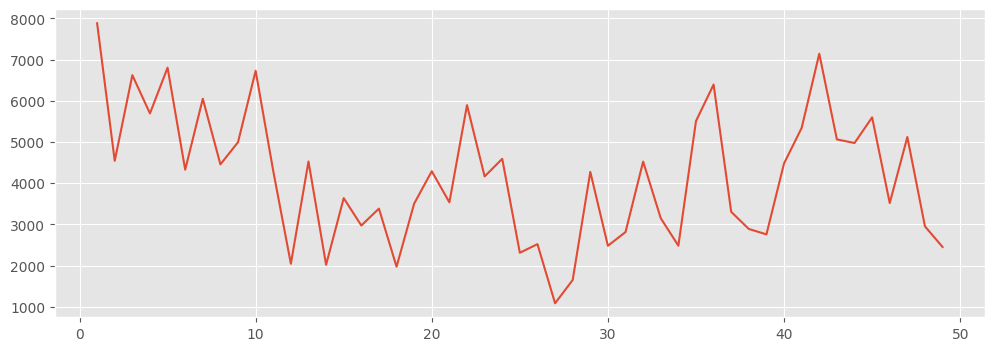

In [33]:
raw_features['time'].value_counts().sort_index().plot()

In [41]:
raw_features = pd.merge(raw_features,raw_classes,left_on='id',right_on='txId',how='left')


In [51]:
raw_features.drop(columns='txId',axis=1,inplace=True)

<Axes: xlabel='time', ylabel='id'>

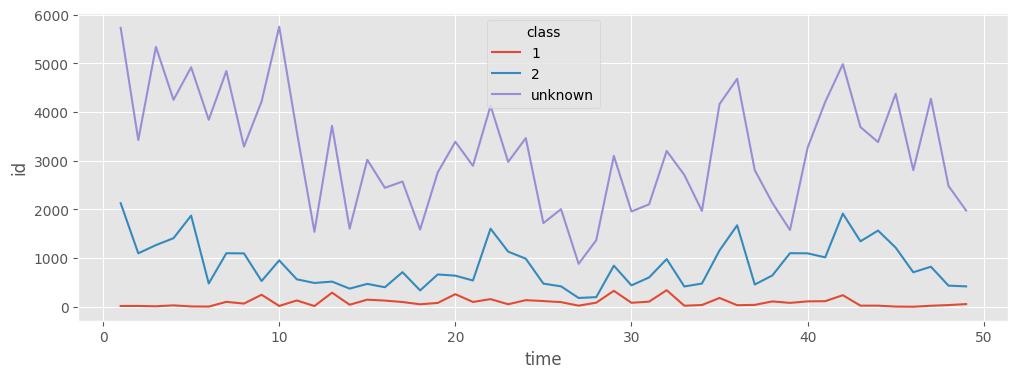

In [67]:
sns.lineplot(data=raw_features.groupby(['class','time']).count()['id'].reset_index(),hue='class',x='time',y='id')

In [69]:
df =  raw_features.copy()
df.drop(columns=['id','time'],axis=1,inplace=True)

In [85]:
df['class']=df['class'].replace({"unknown":-1,1:1,2:0}).astype('int')

In [86]:
prueba_1=df[df['class']==1] # 1) Split "1" Class array 
prueba_1

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
906,-0.172669,0.048298,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.163319,-0.169138,-0.049707,...,-0.285627,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
1360,-0.164417,0.048298,-1.201369,0.178180,-0.043875,0.222447,-0.061584,-0.163580,-0.164278,-0.022718,...,-0.500080,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,-1.760926,-1.760984,1
2717,-0.164272,0.048298,-1.201369,0.028105,-0.043875,0.054722,-0.061584,-0.163191,-0.163923,-0.016812,...,1.757982,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
2814,-0.168195,0.048298,-1.201369,-0.046932,-0.063725,-0.029140,-0.061584,-0.163574,-0.164695,-0.006824,...,-0.600999,0.241128,0.241406,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,1
3422,-0.169109,0.048298,-1.201369,-0.046932,-0.043875,-0.029140,-0.061584,-0.162900,-0.166282,-0.027389,...,0.584799,-0.979074,-0.978556,-0.098889,-0.087490,-0.084674,-0.140597,1.519700,1.521399,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203684,-0.172493,-0.090143,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163588,-0.169212,-0.048440,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203707,-0.172795,-0.078182,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163639,-0.169286,-0.048469,...,-0.090097,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203735,-0.170895,0.071985,1.573595,0.328255,-0.043875,0.390171,-0.061584,-0.163629,-0.168980,-0.047736,...,1.575067,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1
203758,-0.170412,-0.078164,1.018602,0.028105,-0.043875,0.054722,-0.061584,-0.163631,-0.167106,-0.032993,...,1.606604,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,1


In [87]:
prueba_0=df[df['class']==0] # 1) Split "0" Class array 
prueba_0

,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,trans_feat_8,trans_feat_9,...,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71,class
2,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,-0.115831,0.043598,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,0
8,-0.005027,0.578941,-0.091383,4.380281,-0.063725,4.667146,0.851305,-0.163645,-0.144554,0.020069,...,-0.613614,0.241128,0.241406,0.604120,0.008632,-0.131155,0.333211,-0.120613,-0.119792,0
9,-0.147852,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.137933,-0.144108,-0.049707,...,-0.613614,0.241128,0.241406,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
10,-0.151357,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.141519,-0.147643,-0.049707,...,-0.582077,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
15,-0.172306,-0.184668,-1.201369,0.028105,-0.043875,-0.029140,0.242712,-0.163640,-0.169115,-0.047227,...,-0.600999,0.241128,0.241406,0.018279,-0.068266,-0.084674,-0.054450,-1.760926,-1.760984,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203739,-0.133841,-0.109114,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.123596,-0.129972,-0.049707,...,1.467840,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203749,-0.172455,-0.138626,1.018602,-0.121970,-0.043875,-0.113002,-0.061584,-0.163104,-0.168926,-0.049707,...,-0.569462,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,0
203751,-0.159293,-0.037276,1.018602,-0.121970,0.035526,-0.113002,-0.061584,-0.149635,-0.155646,-0.049707,...,1.408971,0.231244,-0.388216,-0.098889,1.931078,3.168259,3.707301,-1.390548,-1.214035,0
203753,-0.172962,-0.126566,1.018602,-0.121970,-0.063725,-0.113002,-0.061584,-0.163622,-0.169437,-0.049707,...,0.647874,0.241128,0.241406,10.914916,1.700384,-0.131155,7.914145,-0.120613,-0.119792,0


In [ ]:
def rand_bin_array(K, N):
    arr = np.zeros(N,int)

    arr[:K]  = int( 1)
    np.random.shuffle(arr)
    return arr

In [268]:
prueba=df[df['class']==-1] 
prueba['class']= rand_bin_array(15268,157204)

array([<Axes: ylabel='class'>], dtype=object)

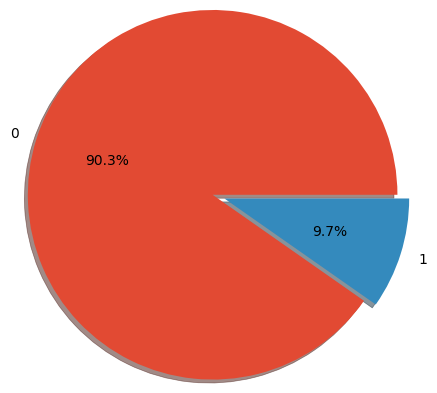

In [269]:
rdf =pd.concat([prueba,prueba_0,prueba_1])
rdf['class'].value_counts().plot(kind='pie',subplots=True,autopct='%1.1f%%', radius=1.5, shadow=True, explode=[0.05, 0.05])

In [270]:
rdf = rdf.sample(len(rdf))

In [271]:
tdf = rdf['class'].value_counts().to_frame()
tdf['Percent'] = tdf.apply(lambda x: (x/tdf['class'].sum())*100,axis=1)

In [272]:
tdf

,class,Percent
0,183955,90.276687
1,19813,9.723313


In [273]:
X = rdf.drop(['class'], axis = 1).values
Y = rdf["class"].values

# Checking with PCA

In [274]:
from sklearn.decomposition import PCA,FastICA
from sklearn.manifold import TSNE

CPU times: total: 1min
Wall time: 18.3 s


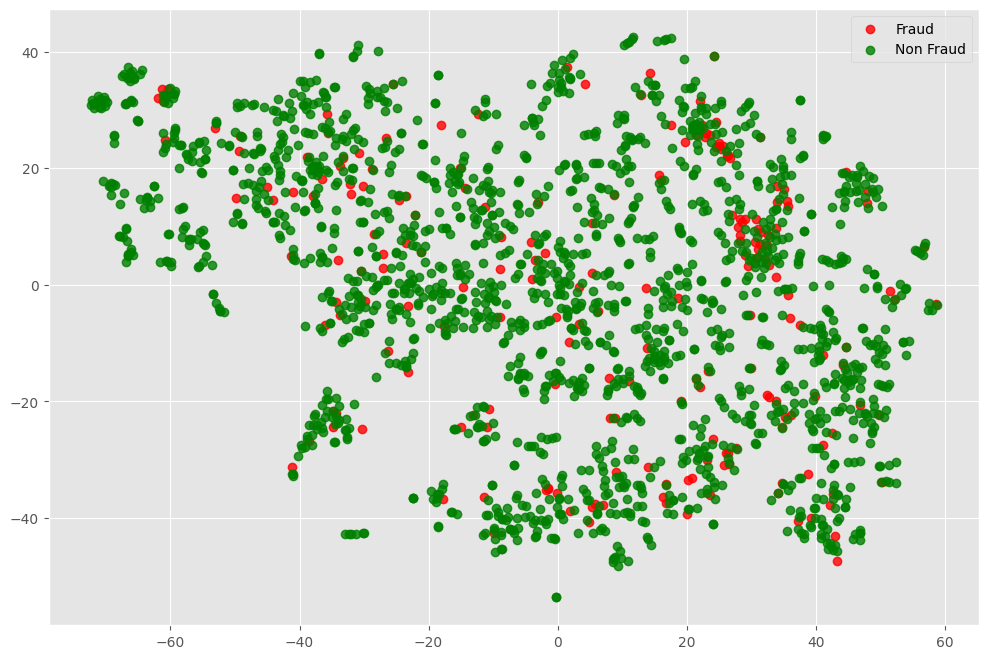

In [275]:
%%time 
ts = TSNE()
x_t = ts.fit_transform(X[:2000])

plt.figure(figsize=(12, 8))
plt.scatter(x_t[np.where(Y[:2000] == 1), 0], x_t[np.where(Y[:2000] == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
plt.scatter(x_t[np.where(Y[:2000] == 0), 0], x_t[np.where(Y[:2000] == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')

plt.legend(loc='best')

CPU times: total: 188 ms
Wall time: 150 ms


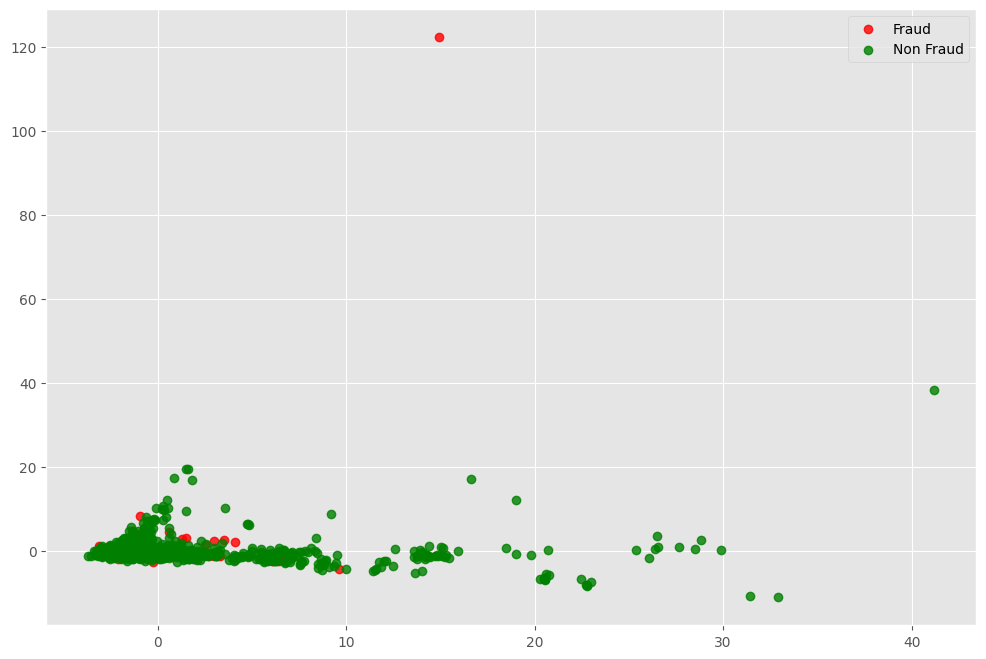

In [276]:
%%time 
ts = PCA()
x_t = ts.fit_transform(X[:2000])

plt.figure(figsize=(12, 8))
plt.scatter(x_t[np.where(Y[:2000] == 1), 0], x_t[np.where(Y[:2000] == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
plt.scatter(x_t[np.where(Y[:2000] == 0), 0], x_t[np.where(Y[:2000] == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')

plt.legend(loc='best')

CPU times: total: 10.2 s
Wall time: 6.82 s


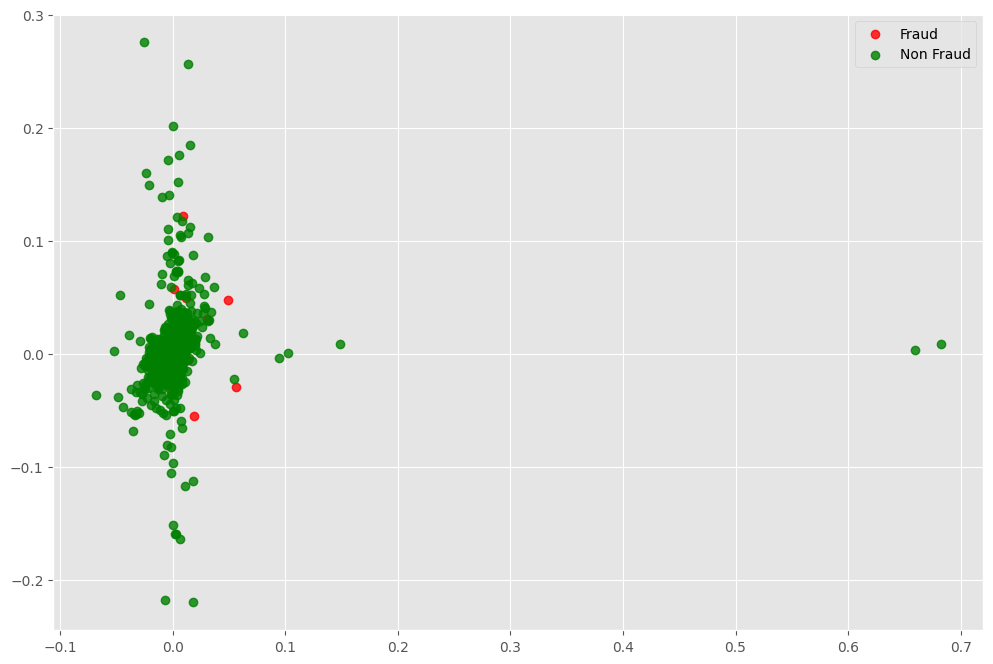

In [277]:
%%time 
ts = FastICA()
x_t = ts.fit_transform(X[:2000])

plt.figure(figsize=(12, 8))
plt.scatter(x_t[np.where(Y[:2000] == 1), 0], x_t[np.where(Y[:2000] == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
plt.scatter(x_t[np.where(Y[:2000] == 0), 0], x_t[np.where(Y[:2000] == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')

plt.legend(loc='best')

In [278]:

from keras import Model
from keras import regularizers
from keras.layers import Input, Dense


input_layer = Input(shape=(X.shape[1],))

## encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoded = Dense(50, activation='relu')(encoded)

## decoding part
decoded = Dense(50, activation='tanh')(encoded)
decoded = Dense(100, activation='tanh')(decoded)

## output layer
output_layer = Dense(X.shape[1], activation='relu')(decoded)

In [279]:
try: del model
except: pass
model = Model(input_layer,output_layer)
model.compile(optimizer='adam',loss='mae')

In [280]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 165)]             0         
                                                                 
 dense_35 (Dense)            (None, 100)               16600     
                                                                 
 dense_36 (Dense)            (None, 50)                5050      
                                                                 
 dense_37 (Dense)            (None, 50)                2550      
                                                                 
 dense_38 (Dense)            (None, 100)               5100      
                                                                 
 dense_39 (Dense)            (None, 165)               16665     
                                                                 
Total params: 45,965
Trainable params: 45,965
Non-trainabl

In [281]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
xs =  MinMaxScaler(feature_range=(0,1)).fit_transform(X)


In [282]:
x_norm, x_fraud = xs[Y == 0], xs[Y == 1]

In [283]:
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping
try: del callback
except: pass
callback  =  [PlotLossesKeras(),EarlyStopping(monitor='val_loss',min_delta=1e-7,patience=10)]


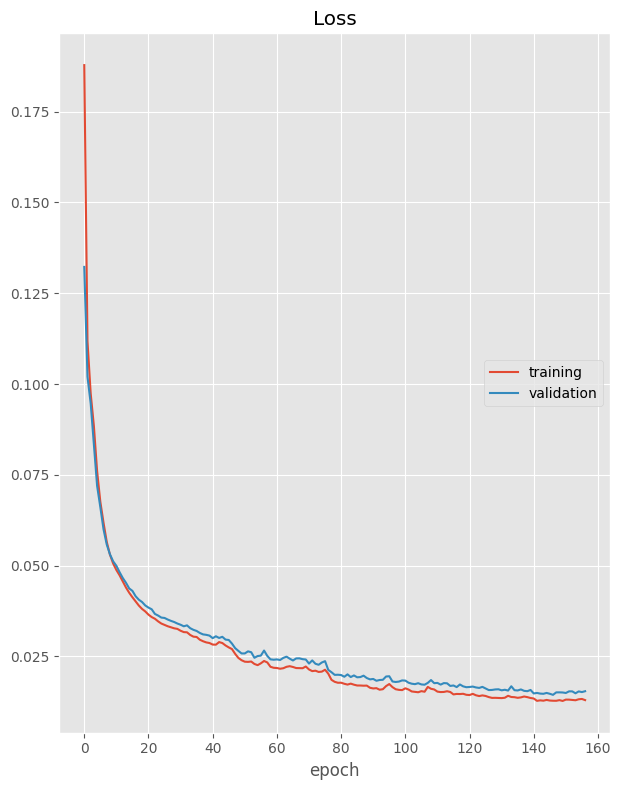

Loss
	training         	 (min:    0.013, max:    0.188, cur:    0.013)
	validation       	 (min:    0.014, max:    0.132, cur:    0.015)
13/13 [==============================] - 1s 45ms/step - loss: 0.0130 - val_loss: 0.0154


In [284]:
model.fit(x_norm[0:2000], x_norm[0:2000], 
                batch_size = 128, epochs = 1000, 
                shuffle = True, validation_split = 0.20,callbacks=callback);

In [285]:
from keras.models import Sequential
try: del cell
except: pass
cell =  Sequential()
for i in range(0,3):
    print(f'Added layer -> {i}, with shape Input = {model.layers[i].input_shape} Output = {model.layers[i].output_shape}')
    cell.add(model.layers[i])

Added layer -> 0, with shape Input = [(None, 165)] Output = [(None, 165)]
Added layer -> 1, with shape Input = (None, 165) Output = (None, 100)
Added layer -> 2, with shape Input = (None, 100) Output = (None, 50)


In [286]:
x_norm_t = x_norm[:2000]
x_fraud_t  =  x_fraud[:2000]

In [287]:
x_norm_p = cell.predict(x_norm_t)
x_fraud_p = cell.predict(x_fraud_t)

63/63 [==============================] - 0s 2ms/step


In [292]:
x_p = np.concatenate([x_norm_p,x_fraud_p])
y_p = np.concatenate([np.zeros(x_norm_p.shape[0]),np.ones(x_fraud_p.shape[0])])

In [293]:
%%time 
ts = TSNE()
x_t = ts.fit_transform(x_p)



CPU times: total: 2min 14s
Wall time: 41.8 s


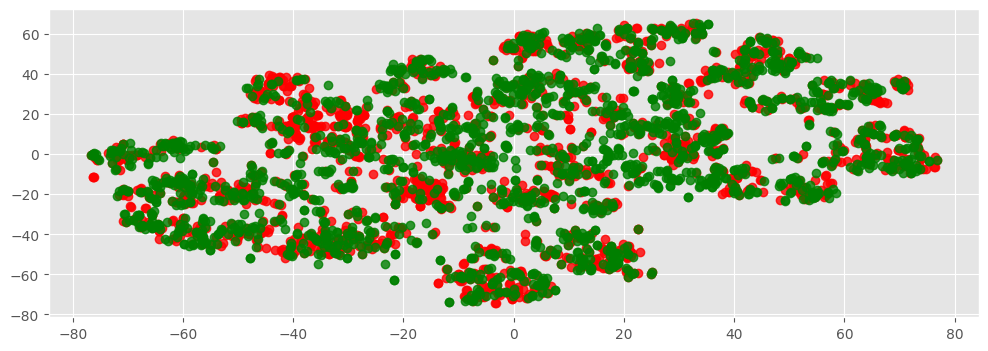

In [294]:
plt.scatter(x_t[np.where(y_p == 1), 0],x_t[np.where(y_p == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='Fraud')
plt.scatter(x_t[np.where(y_p == 0), 0],x_t[np.where(y_p == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='Non Fraud')

In [291]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score

train_x, val_x, train_y, val_y = train_test_split(x_p, y_p, test_size=0.25)
clf = LogisticRegression(solver="lbfgs",max_iter=4000).fit(train_x, train_y)
pred_y = clf.predict(val_x)

print ("")
print ("Classification Report: ")
print (classification_report(val_y, pred_y))

print ("")
print ("Accuracy Score: ", accuracy_score(val_y, pred_y))


Classification Report: 
              precision    recall  f1-score   support

         0.0       0.57      0.50      0.53       487
         1.0       0.57      0.64      0.60       513

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000


Accuracy Score:  0.57
